# Example
This notebook collects data from the Raspberry Pi's core and onboard ring oscillator, and saves it at the specified location. The second script charts the data and saves it at the specified location.

In [74]:
import time # for time stamp
import subprocess as sp # for using system commands and saving the result
import pandas as pd # for DataFrame tools
import matplotlib.pyplot as plt # for charting data

In [99]:
# script setup
loops = 100 # number of loops
interval = 0.1 # loop interval in seconds
file_name = "raw/example.csv" # location of output data (.csv), or just None
print_data = False # print data on 

# print configuration
print("Loops(#):",loops,", Interval(s):",interval,", Time(s):",loops*interval)

# get data using subprocess package and vcgencmd
def get_data(t):
    core_t = float(sp.check_output(["vcgencmd","measure_temp"])[5:9])
    core_f = float(sp.check_output(["vcgencmd","measure_clock","core"])[13:22])/1000000
    core_v = float(sp.check_output(["vcgencmd","measure_volts","core"])[5:11])
    ring_t = str(sp.check_output(["vcgencmd","read_ring_osc"]))
    ring_f = float(ring_t.split('=')[1].split('M')[0])
    ring_v = float(ring_t.split('@')[1].split('V')[0])
    ring_t = float(ring_t[-10:].split('\'')[0])
    return [t,core_t,core_f,core_v,ring_t,ring_f,ring_v]

# initialize dataframe
header = ["AbsTime(s)","CoreTemp(C)","CoreFreq(MHz)","CoreVolt(V)",
          "RingTemp(C)","RingFreq(MHz)","RingVolt(V)"]
data = pd.DataFrame(columns = header)
if print_data:
    print(*header,sep = '\t')

# populate dataframe
new_row = pd.DataFrame()
for i in range(loops):
    t = time.time() # get a timestamp for this loop
    new_row = get_data(t)
    if print_data:
        print(*new_row,sep = '\t')
    else:
        print('.',end='') # print some feedback instead of data
    data.loc[len(data)] = new_row
    elapsed = time.time() - t
    if elapsed < interval:
        time.sleep(interval - elapsed)

# save and display dataframe
data.to_csv(file_name,index=False) # save data
print("\Saved as:",file_name)
display(pd.read_csv(file_name)) # verify

Loops(#): 100 , Interval(s): 0.1 , Time(s): 10.0
....................................................................................................
Output: raw/example.csv


,AbsTime(s),CoreTemp(C),CoreFreq(MHz),CoreVolt(V),RingTemp(C),RingFreq(MHz),RingVolt(V)
0,1.615593e+09,59.6,400.0,1.3188,59.1,3.329,1.3188
1,1.615593e+09,59.6,400.0,1.3188,59.1,3.328,1.3188
2,1.615593e+09,59.1,400.0,1.3188,60.1,3.327,1.3188
3,1.615593e+09,60.1,400.0,1.3188,60.1,3.328,1.3188
4,1.615593e+09,60.1,400.0,1.3188,60.7,3.328,1.3188
...,...,...,...,...,...,...,...
95,1.615593e+09,61.2,400.0,1.3188,62.3,3.322,1.3188
96,1.615593e+09,62.3,400.0,1.3188,62.3,3.321,1.3188
97,1.615593e+09,61.8,400.0,1.3188,62.3,3.321,1.3188
98,1.615593e+09,62.3,400.0,1.3188,61.8,3.322,1.3188


,AbsTime(s),CoreTemp(C),CoreFreq(MHz),CoreVolt(V),RingTemp(C),RingFreq(MHz),RingVolt(V)
count,1.000000e+02,100.000000,100.000000,100.0000,100.000000,100.00000,100.0000
mean,1.615593e+09,61.358000,399.999860,1.3188,61.395000,3.32360,1.3188
std,3.646131e+00,0.739394,0.000349,0.0000,0.752689,0.00267,0.0000
min,1.615593e+09,59.100000,399.999000,1.3188,59.100000,3.31100,1.3188
25%,1.615593e+09,61.200000,400.000000,1.3188,61.200000,3.32275,1.3188
50%,1.615593e+09,61.200000,400.000000,1.3188,61.200000,3.32400,1.3188
75%,1.615593e+09,61.800000,400.000000,1.3188,61.800000,3.32500,1.3188
max,1.615593e+09,62.300000,400.000000,1.3188,62.300000,3.32900,1.3188



Saved as: pic/example.jpg


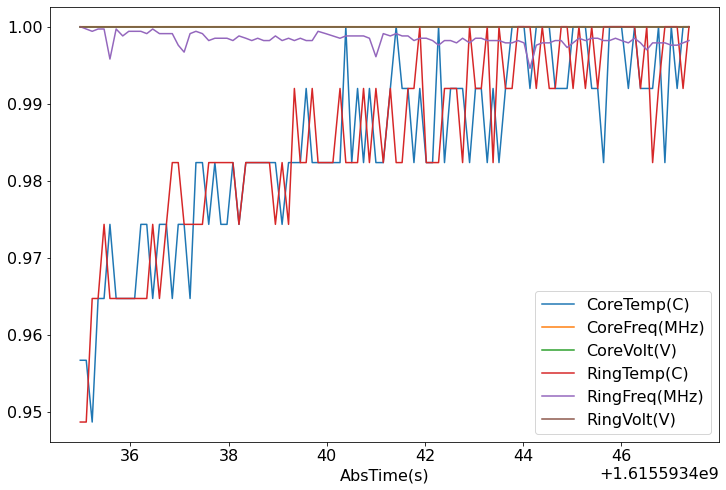

In [133]:
# script setup
width = 12 # width of chart
height = 8 # height of chart
text_size = 16 # size of chart text
chart_name = "pic/example.jpg"
print_stats = True

# convert each column to percentage
def normalize(df):
    df = df.copy(deep=True) # make a copy of the dataframe
    selected = df.columns[1:]
    for c in df[selected].columns:
        df[c] /= df[c].max()
    return df

# statistical description
if print_stats:
    display(data.describe())

# draw chart
print("\nSaved as:",chart_name)
plt.rc("font",size=text_size)
fig = normalize(data).set_index("AbsTime(s)").plot(figsize=(width,height))
plt.savefig(chart_name)